## 11.2 Factorisation

This section illustrates further exhaustive search techniques with
a famous and important problem in number theory and cryptography:
given a positive integer *n*, compute all its positive integer
divisors (also called factors).
For example, the positive integer factors of 5 are 1 and 5, and
those of 10 are 1, 2, 5 and 10.

I start by writing the problem definition and some tests in Python.
To ease testing, I produce the factors in no particular order, as a set.

**Function**: factorisation\
**Inputs**: *n*, an integer\
**Preconditions**: *n* > 0\
**Output**: *factors*, a set\
**Postconditions**: the members of *factors* are all the
positive integer divisors of *n*

In [1]:
from algoesup import check_tests

factorisation_tests = [
    # case,         n,  factors
    ('smallest n',  1,  {1}),
    ('2 factors',   2,  {1, 2}),
    ('3 factors',   25, {1, 5, 25}),
    ('4 factors',   10, {1, 2, 5, 10}),
    ('5+ factors',  40, {1, 2, 4, 10, 20, 40})
]

check_tests(factorisation_tests, [int, set])

OK: the test table passed the automatic checks.


To apply brute-force search I must state the problem as
'find those candidates that satisfy these criteria'. For this problem
we must find those positive integers that divide *n* without remainder.

<div class="alert alert-warning">
<strong>Note:</strong> To apply exhaustive search, rephrase the problem at hand
as a search problem.
</div>

### 11.2.1 Make candidates explicit

To obtain a brute-force search algorithm we must answer these questions:

- What are the candidates?
- How are they generated, one by one?
- How is each candidate tested?

The second question is very easy to answer if we have a collection of
candidates to iterate over but the input is a single integer.
We must first create a collection of candidates to apply linear search.

By rephrasing factorisation as a search problem, the candidates became
explicit: the positive integers. Unfortunately, there are
infinitely many of them, and the algorithm would never stop iterating.
For brute-force search to work, two conditions must be met:
the collection of candidates is finite and includes all solutions.
Can you think of a finite range of positive integers that
includes the factors of *n*?

___

The smallest positive integer is 1 and no number higher than *n*
divides *n*, so the integers from 1 to *n* include all factors of *n*.

<div class="alert alert-warning">
<strong>Note:</strong> If the solutions are integers, determine the smallest and largest solutions to obtain a finite range of candidates.
</div>

Having a finite collection of candidates (1 to *n*), we turn to
the other two questions of how to generate and test each one.
Generating integers within a range is trivial with a for-loop.
Checking if a candidate is a solution, i.e. a divisor of *n*,
is also trivial with the modulo operation.

1. let *factors* be the empty set
2. for each *candidate* from 1 to *n*:
    1. if *n* mod *candidate* = 0:
        1. add *candidate* to *factors*

What's the complexity of this algorithm?

___

The algorithm is a linear search over the integers from 1 to *n* and
for each one executes two or three constant-time operations
(just step&nbsp;2.1 or also step&nbsp;2.1.1).
The best- and worst-case complexities are thus linear in *n*: Θ(*n*).

The code is a direct translation of the algorithm to Python.

In [2]:
from algoesup import test


def factorisation(n: int) -> set:
    """Return all positive integer divisors of n.

    Preconditions: n > 0
    """
    factors = set()
    for candidate in range(1, n + 1):
        if n % candidate == 0:
            factors.add(candidate)
    return factors


test(factorisation, factorisation_tests)

Testing factorisation...
5+ factors FAILED: {1, 2, 4, 5, 8, 40, 10, 20} instead of {1, 2, 4, 20, 40, 10}
Tests finished: 4 passed (80%), 1 failed.


The last test fails. It's easy to see why, because
the test function prints the actual and expected outputs:
I forgot two factors of 40.
I must replace the expected output of the last test.

In [3]:
factorisation_tests[-1] = ("5+ factors", 40, {1, 2, 4, 5, 8, 10, 20, 40})
test(factorisation, factorisation_tests)

Testing factorisation...
Tests finished: 5 passed (100%), 0 failed.


As explained [previously](../02_Sequence/02_5_maths_functions.ipynb#2.5.2-Algorithms),
an algorithm is correct if it produces an output that satisfies
the postconditions for each input that satisfies the preconditions.
To properly check the implementation of an algorithm,
every test must associate a valid input to a valid output;
otherwise the test itself is incorrect.
Here, the test is incorrect because 40&nbsp;satisfies the preconditions but
{1, 2, 4, 10, 20, 40} doesn't satisfy the postconditions: the set doesn't
contain all positive integer divisors of 40, it's missing two of them.

<div class="alert alert-warning">
<strong>Note:</strong> If the code fails a test, maybe the code is correct and the test isn't.
</div>

### 11.2.2 Compute solutions

Sometimes, once you find a solution, you can directly compute other
solutions from it and remove them from the candidates.
This reduces the remaining number of candidates to generate and test.
For this problem, if we have a factor *f* of *n*,
then _n/f_ is the 'symmetric' factor, e.g. if 2 divides 10 then
10 / 2 = 5 also divides 10.

The algorithm must start with an explicit collection of candidates
so that the computed solutions can be removed from it.

1. let *factors* be the empty set
2. let *candidates* be {1, ..., *n*}
3. while *candidates* isn't empty:
   1. remove some *candidate* from *candidates*
   2. if *n* mod *candidate* = 0:
      1. add *candidate* to *factors*
      2. add *n* / *candidate* to *factors*
      3. remove *n* / *candidate* from *candidates*

This algorithm is a linear search because
it iterates over a given collection, but contrary to a for-loop,
it goes through the candidates in no particular order.
I'll show you shortly how to implement step&nbsp;3.1 in Python.

What are the best- and worst-case complexities of this algorithm?
Assume step&nbsp;3.1 takes constant time.

___

All operations within the while-loop take constant time.
The number of iterations is either *n*&nbsp;/&nbsp;2 in the best case
(each iteration removes two factors) or *n* in the worst case
(each iteration removes one factor).
The algorithm is thus linear in *n* in the best and worst cases.

Let's move on to the code.
Steps 3.2.2 and 3.2.3 of the algorithm divide integers to obtain
the integer factors. In Python, the division operator `/` always produces
a floating-point number, so we must use `//` (integer division) instead.

Step&nbsp;3.1 is implemented with Python's `set` method `pop()`, which
removes and returns an arbitrary set member.

In [4]:
def symmetric_factorisation(n: int) -> set:
    """Return all positive integer divisors of n.

    Preconditions: n > 0
    """
    factors = set()
    candidates = set(range(1, n + 1))
    while len(candidates) > 0:
        candidate = candidates.pop()
        if n % candidate == 0:
            factors.add(candidate)
            factors.add(n // candidate)
            candidates.discard(n // candidate)
    return factors


test(symmetric_factorisation, factorisation_tests)

Testing symmetric_factorisation...
Tests finished: 5 passed (100%), 0 failed.


### 11.2.3 Sort candidates

In [Section&nbsp;11.1.3](./11_1_linear.ipynb#Sorted-candidates)
you saw that sorting the products in store
allowed the linear search to stop early.
My first factorisation approach generates the factors in ascending
order, while the second computes some factors directly.
Let's try to combine both approaches and see if we can stop early
due to the sorted order of the candidates.

The combined algorithm tests candidates *f* in ascending order
(1, 2, 3, ...) and, if they're a factor, adds *n* / *f* to *factors*.
As *f* increases, *n* / *f* decreases (*n*/1, *n*/2, *n*/3, ...),
so at some point *f* > *n* / *f*. If the algorithm continues testing and
increasing *f* from that point onwards, then it will only find the
same factors that were already computed.
When *f* > *n* / *f* we have *f*² > *n*.
At that point we can stop generating and testing candidates.

To sum up, by generating candidates in ascending order and by
computing the symmetric factors, we can stop much earlier:
when the square of the candidate is *n*.

1. let *factors* be the empty set
2. let *candidate* be 1
3. while *candidate* × *candidate* ≤ *n*:
   1. if *n* mod *candidate* = 0:
      1. add *candidate* to *factors*
      2. add *n* / *candidate* to *factors*
   2. increment *candidate*

In [5]:
def root_factorisation(n: int) -> set:
    """Return all positive integer divisors of n.

    Preconditions: n > 0
    """
    factors = set()
    candidate = 1
    while candidate * candidate <= n:
        if n % candidate == 0:
            factors.add(candidate)
            factors.add(n // candidate)
        candidate = candidate + 1
    return factors


test(root_factorisation, factorisation_tests)

Testing root_factorisation...
Tests finished: 5 passed (100%), 0 failed.


The algorithm does $\sqrt{n}$ iterations and each takes constant time, so
the complexity is Θ($\sqrt{n}$).
This is a vast improvement. Imagine *n* is one million.
The original algorithm does one million iterations but
this one only executes a thousand!

The new algorithm isn't just faster: it copes much better with a growing input.
The larger the input, the larger the run-time reduction,
compared to the full linear search from 1 to *n*.
A picture shows it better.

I am going to use another function of the `algoesup` module.
It measures the run-times of one or more functions that take an integer as input,
executing them for *n* = 1, 2, 4, ..., 1024.

Inputs generated by int_value

Input value   factorisation symmetric_facto root_factorisat 
          1           152.6           275.4           150.5 ns
          2           184.7           282.8           151.0 ns
          4           237.8           422.5           217.3 ns
          8           328.6           592.8           217.7 ns
         16           576.3          1028.3           345.8 ns
         32           931.9          1789.3           375.6 ns
         64          1608.3          3208.4           528.3 ns
        128          2899.0          6059.1           671.1 ns
        256          5492.0         11496.6           863.4 ns
        512         12655.7         26838.6          1139.5 ns
       1024         28435.9         58488.7          1607.7 ns

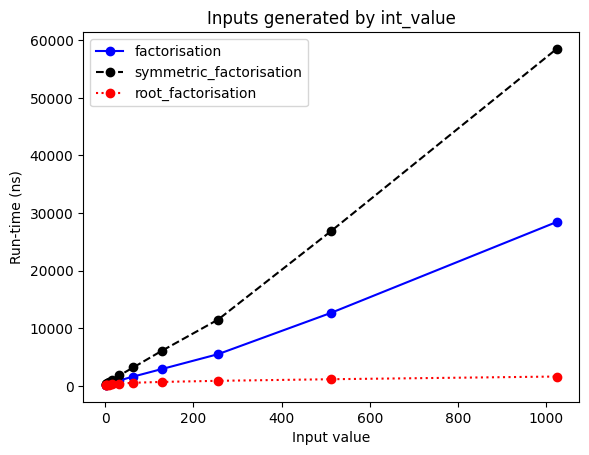

In [6]:
from algoesup import time_functions_int

time_functions_int([factorisation, symmetric_factorisation, root_factorisation])

The basic linear search from 1 to *n* (Section&nbsp;11.2.1) and
the linear search that computes solution *n* / *f* (Section&nbsp;11.2.2)
have linear complexity (the run-times form straight upward lines), but
the latter takes much longer, even though it makes fewer iterations, because
it uses an additional set with the candidates yet to test and so
the operations within each iteration take much longer to execute.

<div class="alert alert-warning">
<strong>Note:</strong> Algorithms with the same complexity may have very different run-times.
</div>

The linear search up to $\sqrt{n}$ (Section&nbsp;11.2.3) seems to have
constant complexity (a horizontal line) because it runs much faster
than the other two and so the time growth is too small to see,
but the table above the line chart shows that the run-times are not constant.

### 11.2.4 Prime numbers

To finish this section, here's a similar problem for practice.

A positive integer *n* is prime if and only if it has exactly two
different positive integer factors, e.g. 1 and 4 aren't prime but 2 is.
Given a positive integer *n*, decide whether it's prime.

#### Exercise 11.2.1

Is `len(factorisation(n)) == 2` an efficient way of solving the problem?

_Write your answer here._

[Answer](../32_Answers/Answers_11_2_01.ipynb)

#### Exercise 11.2.2

[Outline](../06_Implementing/06_4_bounded.ipynb#6.4.1-Outlining-algorithms)
a more efficient algorithm to decide if *n* is prime.

_Write your answer here._

[Hint](../31_Hints/Hints_11_2_02.ipynb)
[Answer](../32_Answers/Answers_11_2_02.ipynb)

#### Exercise 11.2.3 (optional)

Implement your algorithm. Write a docstring and add tests.

In [7]:
import math
from algoesup import test


def is_prime(n: int) -> bool:
    pass


prime_tests = [
    # case,         n,      is_prime
    ('smallest n',  1,      False),
    ('even prime',  2,      True),
    ('n = 4',       4,      False)
]

test(is_prime, prime_tests)

⟵ [Previous section](11_1_linear.ipynb) | [Up](11-introduction.ipynb) | [Next section](11_3_constraints.ipynb) ⟶